## Importing libraries

In [1]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl

## Introduction

- Object detection = classifying muiltiple objects in an image and placing bounding boxes around them.
- Semantic segmentation = clssifying each pixel according to the class of the object it belongs to.

## The architecture of Visual Cortex

- Many neurons in the visual cortex have a small local receptive field, meaning they react only to visual stimuli located in a limited region of the visual field. The receptive fields of different neurons may overlap and together they tile the whole visual field.

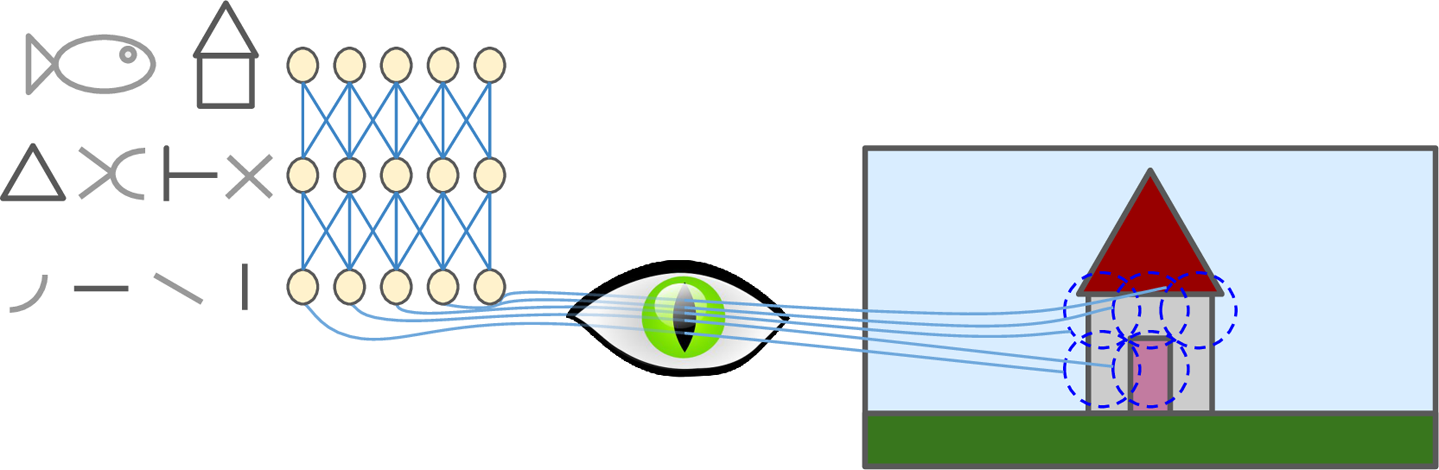

- Some neurons react only to images with horizontal lines and others react only to lines with different orientations(two neurons may have the same receptive field but react to different line orientations).
- Some neurons have large receptive fields and they react to more complex patterns that are combinations of the lower-level patterns. The higher level neurons are based on the outputs of neighbouring lower level neurons. This powerful architecture is able to detect all sorts of complex patterns in the visual field.

- LeNet-5 architecture = widely used by banks to detect hand written cheque numbers. This architecture uses convolutional layers and pooling layers.
- We can use a fully connected deep learning network for small datasets such as MNIST but when it comes to the case of larger datasets, each image maybe of the size 100 x 100 i.e. 10000 pixels per image. If the first layer of a fully connected network has just 1000 neurons(which already restricts the amount of info being passed), then that means a total of 10000 connections. CNNs solve this problem using partially connected layers and weight sharing.

## Convolutional Layers

- A convolution is a mathematical operation that slides one function over another and measures the integral of their pointwise multiplication. It has deep connection with the Fourier transform and the Laplace transform and is heavily used in signal processing. Convolution layers actually use cross-correlations, which are very similar to convolutions.

- Neurons in the first C layer are not connceted to every single pixel in the input image, but only to pixels in their receptive fields. In turn , each neuron in the second layer is connected only to neurons located in a small rectangle in the first layer.


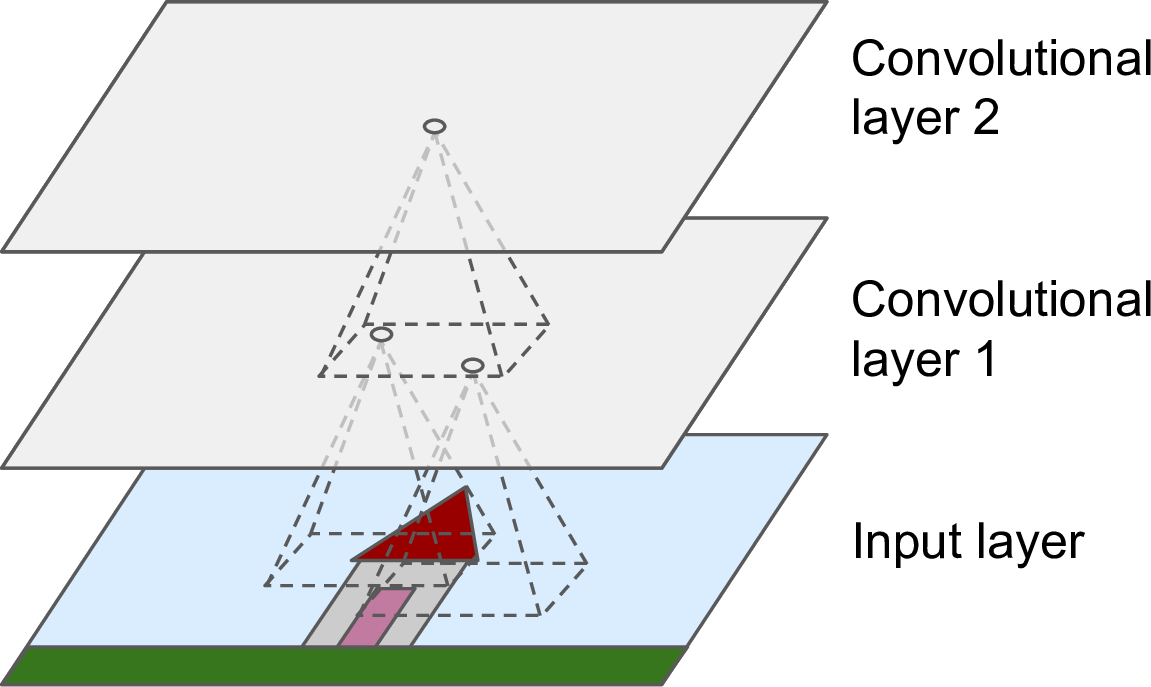

- This architecture allows the network to assemble low-level features in the first hidden layer and the use them to assemble high-level features in the second hidden layer and so on. This hierarchical structure is common in real-world images, which is why CNNs work so well for image recognition.
- All the multilayer NN seen so far had layers composes of a long line of neurons and we had to flatten images to 1D before feeding them to the network. In a CNN, each layer is represented in 2D which makes it easier to match neurons with their corresponding inputs.

- A neuron located in the row `i`, column `j` of a given layer is connected to the outputs of the neurons of the previous layer located in rows `i` to `i+fh-1`, columns `j` to `j+fw-1` where fh and fw are the height and width of the receptive field.
- In order for a layer to have the same height and width of the previous layer, it is common to add zeros around the inputs. This is called zero padding.

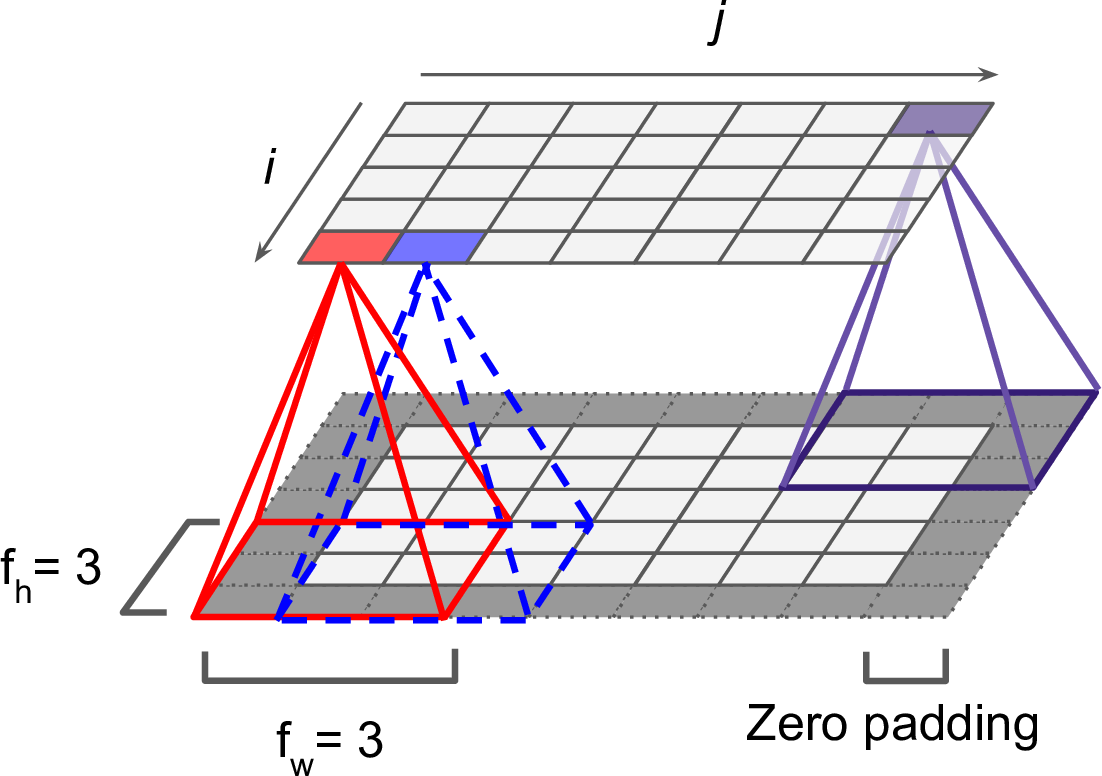

- It is also possible to connect a large input layer to a much smaller layerby spacing out the receptive fields. This dramatically reuces the model's computational complexity. The shift from one receptive field to the nect is called stride.
- A neuron located in row i, column j in the upper layer is connected to the outputs of the neurons in the previous layers located in rows i x sh, i x sh + fh - 1, columns j x sw, j x sw + fw - 1 where sh and sw are the vertical and horizontal strides.

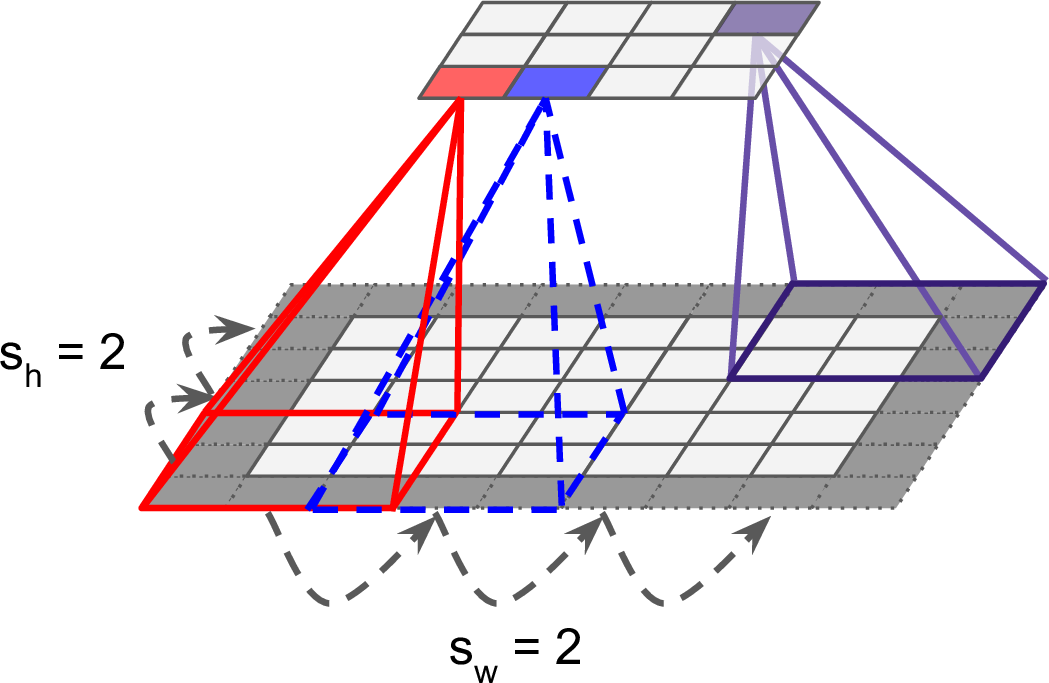

## Filters

- A neruons weights(or filters or convolutional kernels) can be represented as a small image the size of the receptive field.

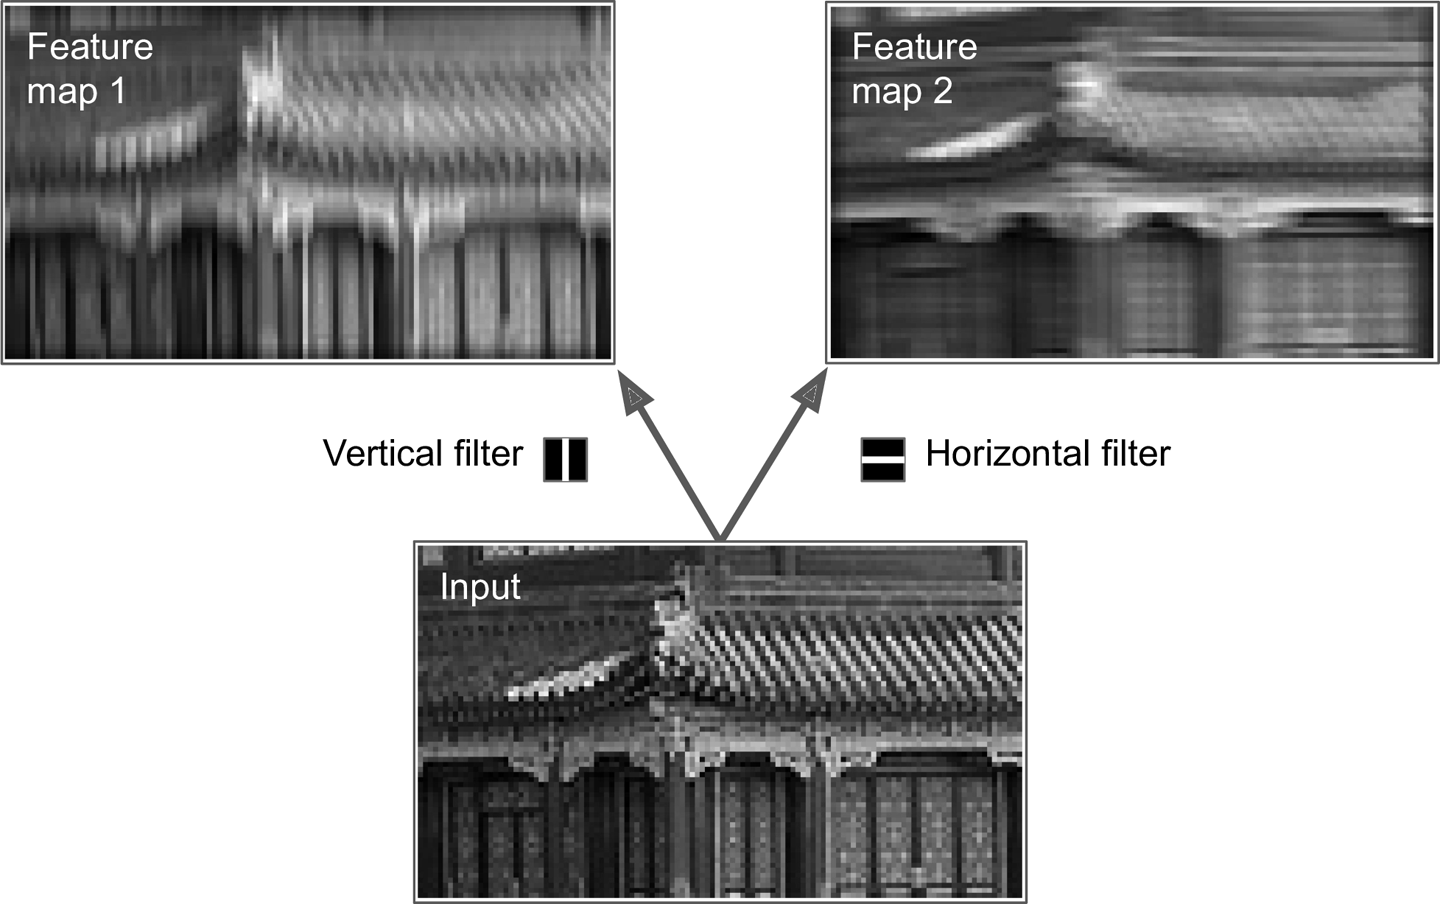

- The above image shows two sets of possible weights. The first one is represented as a black square with a vertical white line in the middle. It is a 7x7 matrix filled with 0's except for the middle line which is filled with 1's. Neurons using these weights will ignore everything in their receptive field except for the central line since the other inputs are multiplied by zero.

- A layer full of neurons using the same filter outputs a feature map, which highlights the areas in the image that activate the filter the most. We do not have to define these filters manually, during training the convolutional layers wil automatically learn the most useful filters for the task and the upper layers will learn to combine them into more complex patterns.

## Stacking multiple feature maps

- Upto now the output of each convolutional layer was represented as a 2D layer, but in reality a convolutional layer has multiple filters and outputs 1 feature map per filter so it is more accurately rpresented in 3D.

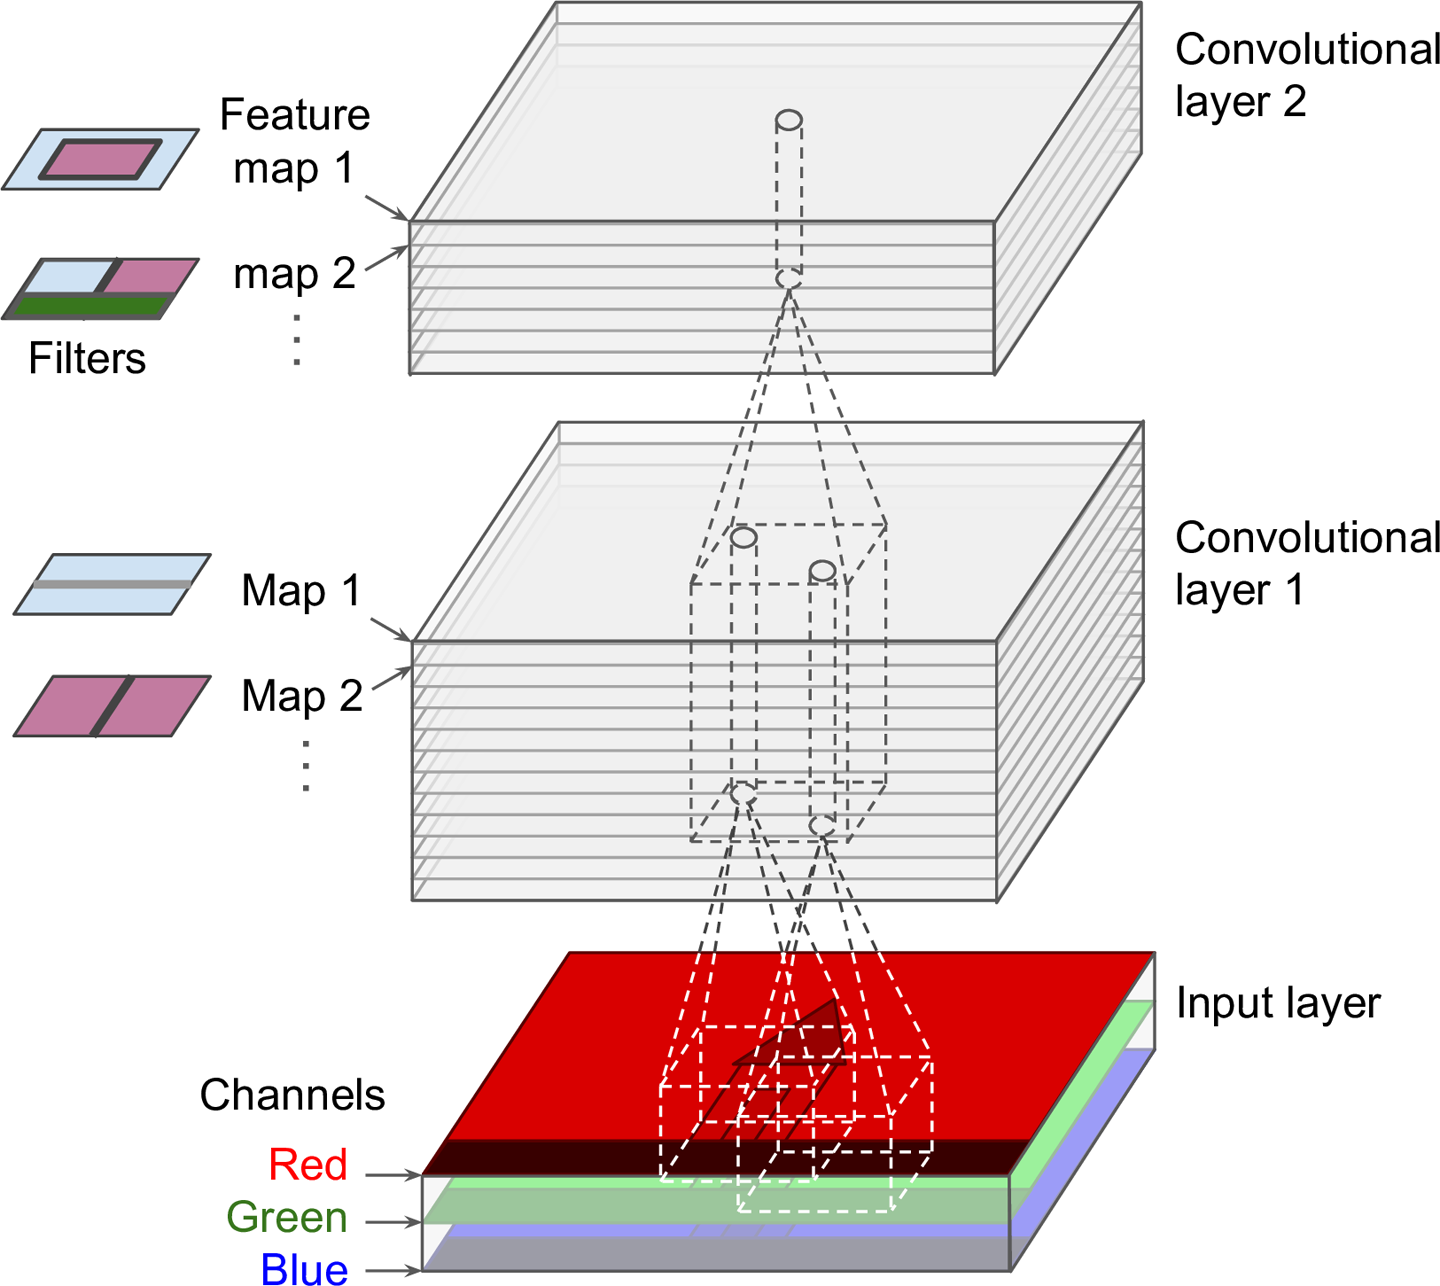

- It has one neuron per pixel in each feature map and all neurons within a given feature map share the same parameters i.e., the same weights and bias terms.
- Neurons in different feature maps use differetn parameters. A neuron's receptive field is same as discussed earlier but it extends across all the previous layer's feature maps.
- In short a convolutional layer applies multiple trainable filters to its inputs, making it capable of capturing multiple features anywhere in its inputs.

- Input images are also composed of multiple sublayers : one per color channel. There are typically 3; red, green and blue (RGB). Grayscale images have just one channel but some images may have much more.
- Specifically a neuron in row i and column j of the feature map k in a convolutional layer l is connected to the outputs of the neurons in the previous layer l-1, located in rows i*sh, i*sh+fh-1 and columns j*sw, j*sw+fw-1 across all feature maps in layer l-1. All the neurons located in row i and columns j of the same layer but different feature maps are connected to the outputs of the same neurons in the previous layer.

## Tensorflow implementation

In [2]:
def plot_image(image):
    plt.imshow(image, cmap = 'gray', interpolation = 'nearest')
    plt.axis('off')

In [3]:
def plot_color_image(image):
    plt.imshow(image, interpolation = 'nearest')
    plt.axis('off')

In [4]:
# Loading sample images
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255

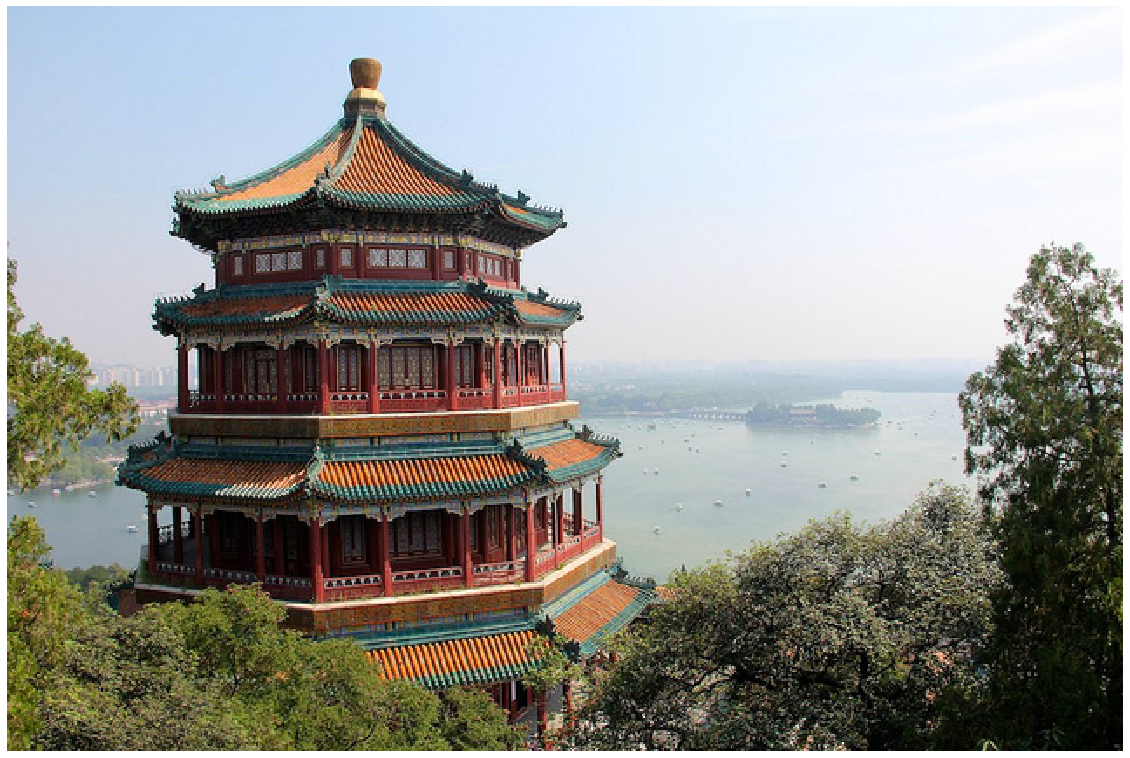

In [5]:
plt.figure(figsize = (20, 20))
plot_color_image(china)
plt.show()

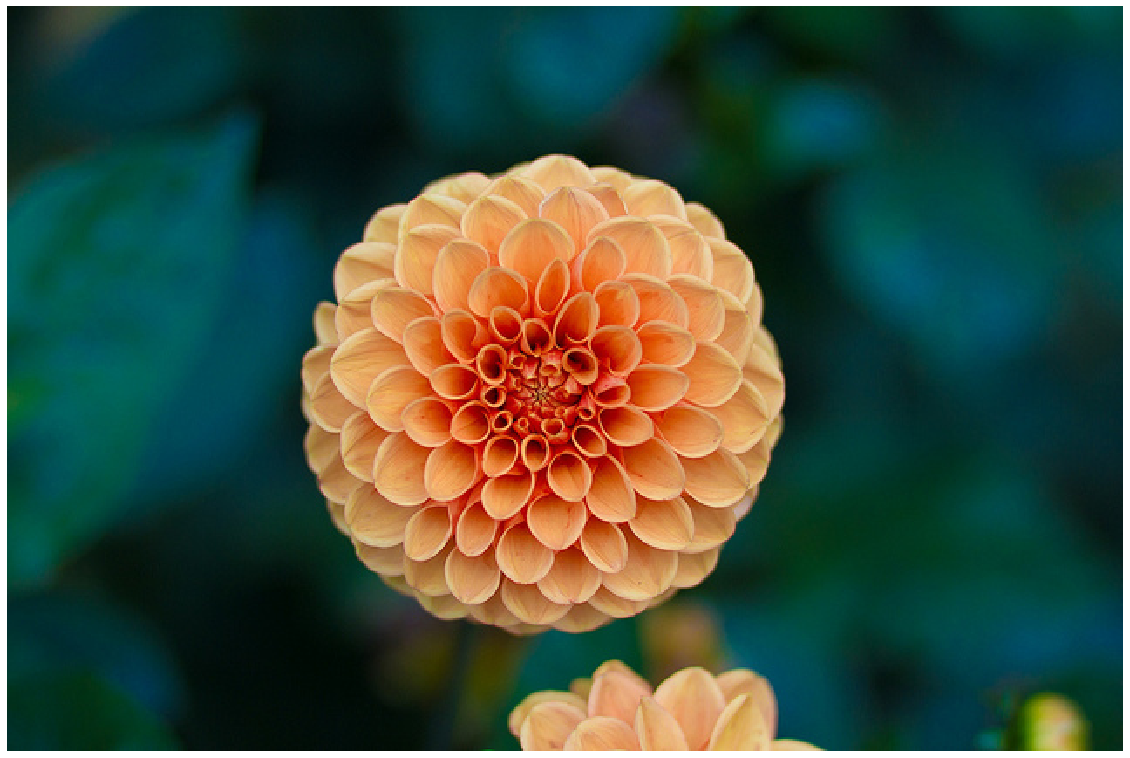

In [6]:
plt.figure(figsize = (20, 20))
plot_color_image(flower)
plt.show()

In [7]:
images = np.array([china, flower])

In [8]:
images.shape

(2, 427, 640, 3)

In [9]:
batch_size, height, width, channel = images.shape

In [10]:
# Creating filters
filters = np.zeros(shape = (7, 7, channel, 2), dtype = np.float32)

In [11]:
# Creating vertical line
filters[:, 3, :, 0] = 1 

In [12]:
# Creating horizontal line
filters[3, :, :, 1] = 1

In [13]:
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = 'SAME') # Creating a Conv. layer using the above features and feeding the images to it.

- images is the input mini-batch(a 4D tensor)
- filters are the set of features to apply(also a 4D tensor)
- strides is equal to 1 but it could also be a 1D array with 4 elements where the 2 central elements are the vertical and horizontal strides(sh and sw). The first and last elements must currently be equal to 1. They may one day be used to specify a batch stride to skip some instances and a channel stride to skip some of the previous layers feature maps or channels.

- Padding must be either 'SAME' or 'VALID'. 
- If set to 'SAME', the convolutional layer uses zero padding if necessary. The output size is set to the no. of input neurons divided by the stride, rounded up. When `strides = 1` the output will be the same size as the input, hence the name same.
- If set to 'VALID', the conv. layer does not use zero padding and may ignore some rows and columns at the bottom and right end of the input image depending on the stride. This means that every neuron's receptive filed strictly lies within valid positions inside the input, it odes not go out of bounds, hence the name valid.

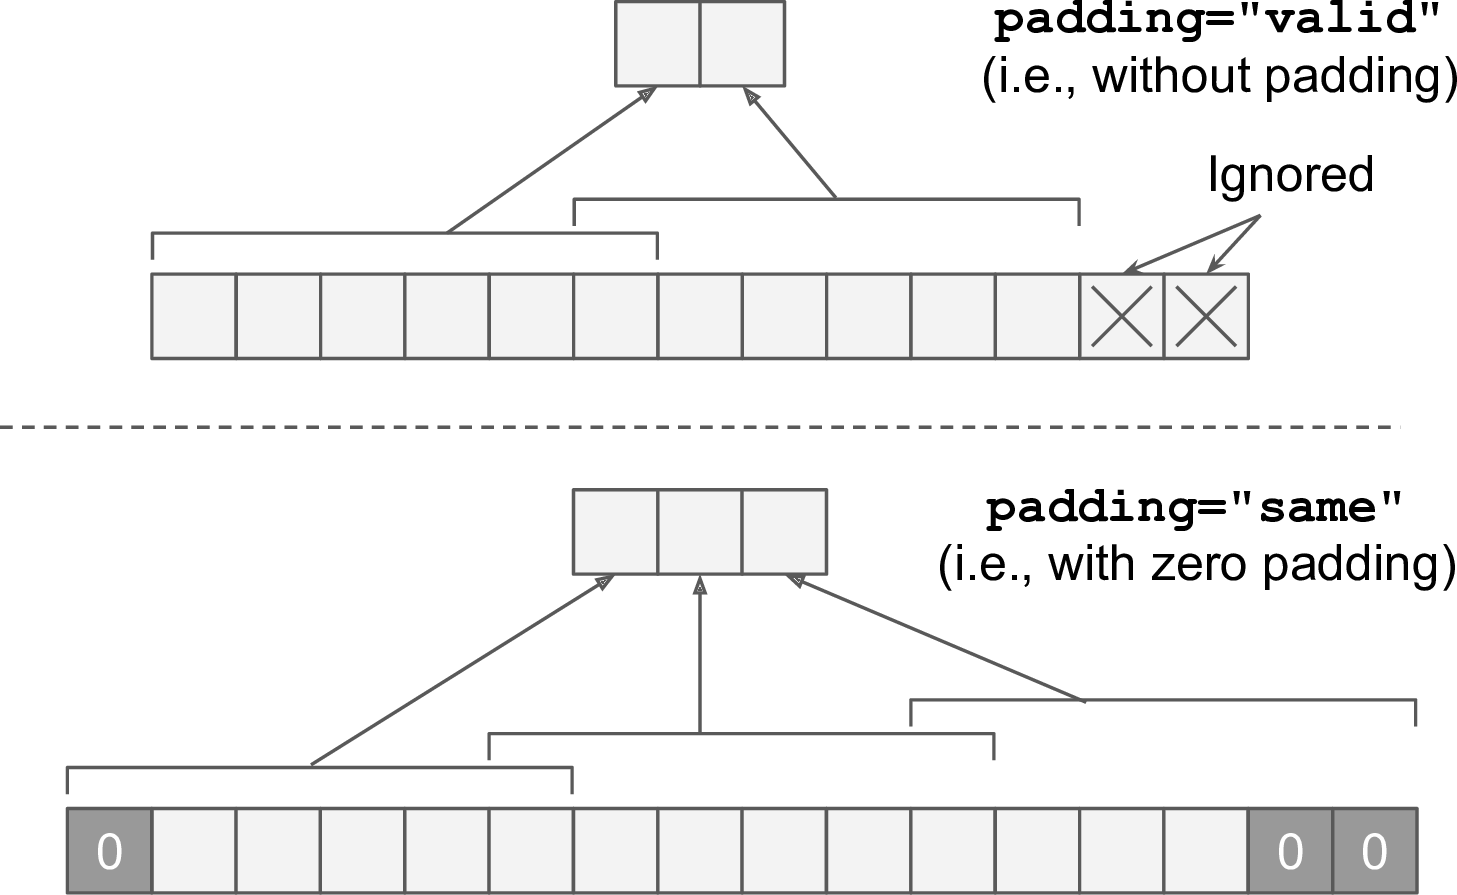

In [14]:
outputs.shape # The last index represents the 2 differetn feature maps

TensorShape([2, 427, 640, 2])

In [15]:
images.shape # The last index represents the 3 different channels

(2, 427, 640, 3)

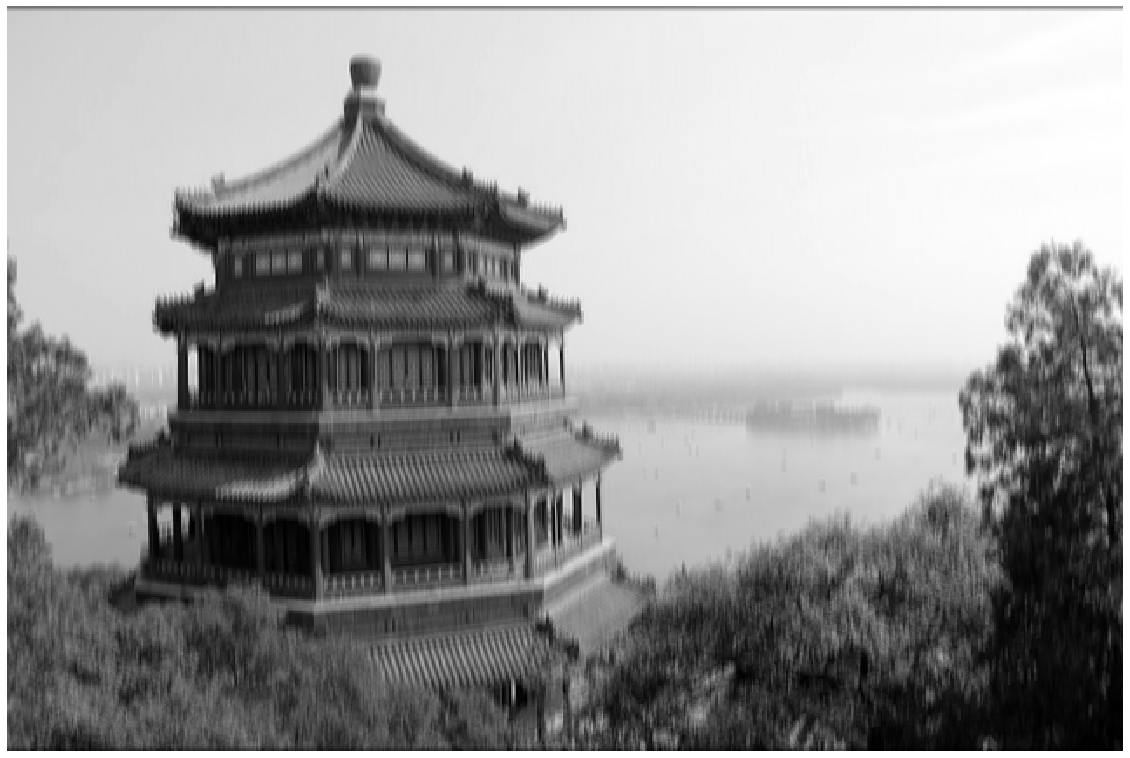

In [16]:
plt.figure(figsize = (20, 20))
plot_image(outputs[0, :, :, 0])
plt.show()

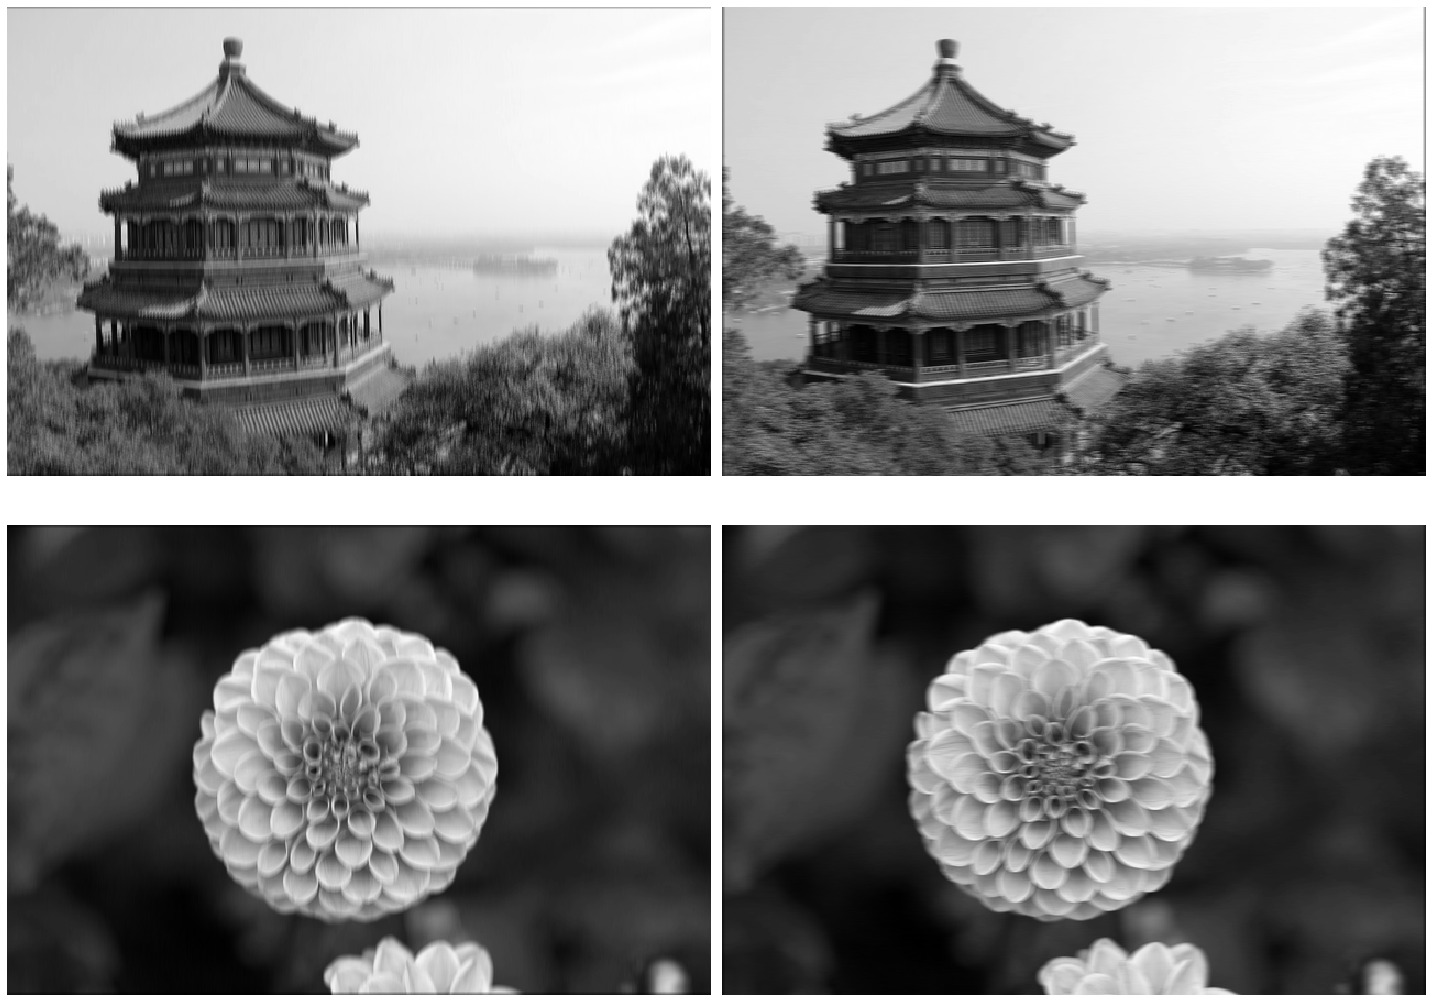

In [17]:
plt.figure(figsize = (20, 15))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])
plt.tight_layout()
plt.show()

In [18]:
def crop(images):
    return images[150:220, 130:250]

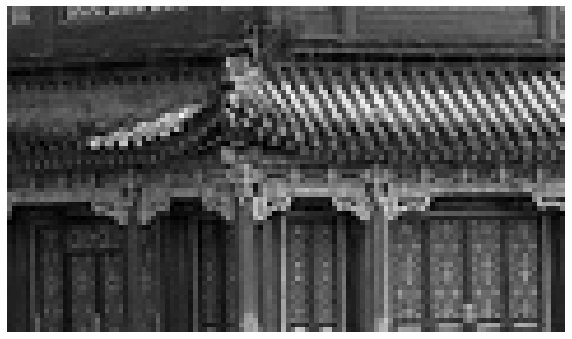

In [19]:
plt.figure(figsize = (10, 10))
plot_image(crop(images[0, :, :, 0]))

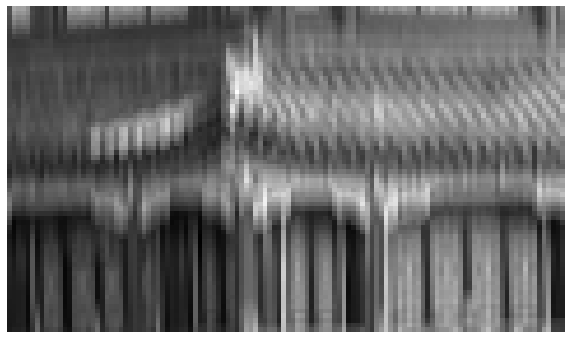

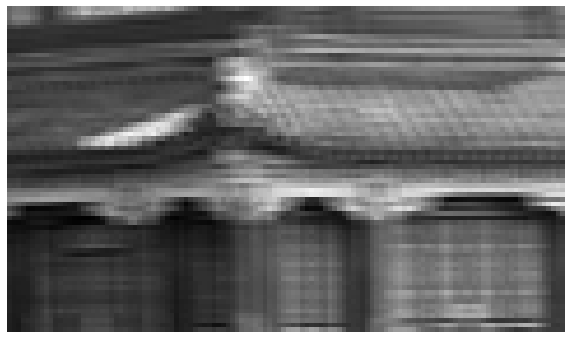

In [20]:
for feature_map_index in range(2):
    plt.figure(figsize = (10, 10))
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

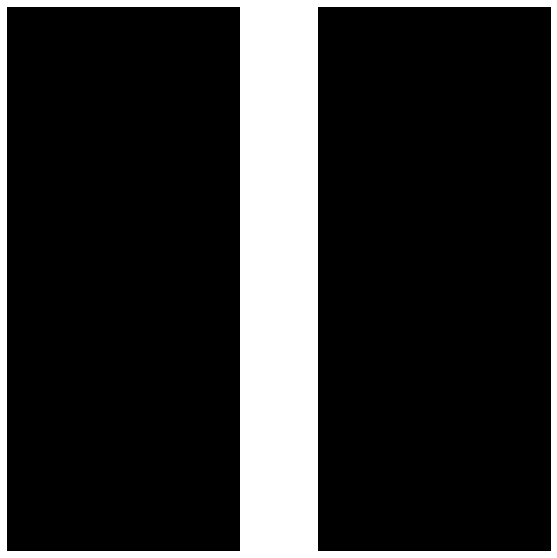

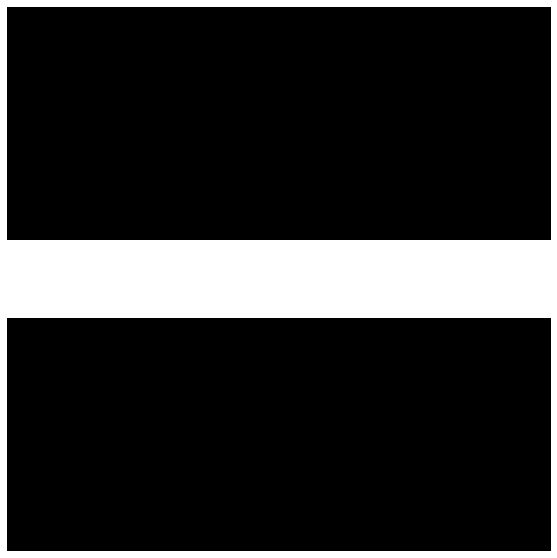

In [21]:
for index in range(2):
    plt.figure(figsize = (10, 10))
    plot_image(filters[:, :, 0, index])
    plt.show()

### Convolutional Layer

In [22]:
conv = keras.layers.Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'SAME', activation = 'relu')

### VALID vs SAME padding

In [23]:
# Func to get the size of the feature map 
def feature_map_size(input_size, kernel_size, strides = 1, padding = 'SAME'):
    if padding == 'SAME':
        return (input_size - 1) // strides + 1
    else:
        return (input_size - kernel_size) // strides + 1

In [24]:
# Func to get the total size of the input including padding and the padding provided in the left side of the input.
def pad_before_and_padded_size(input_size, kernel_size, strides = 1):
    fmap_size = feature_map_size(input_size, kernel_size, strides)
    padded_size = max((fmap_size - 1) * strides + kernel_size, input_size)
    pad_before = (padded_size - input_size) // 2
    return pad_before, padded_size

In [25]:
# Func to perform the padding operation manually
def manual_same_padding(images, kernel_size, strides = 1):
    if kernel_size == 1:
        return images.astype(np.float32) # If kernel_size = 1 return the same input as feature map
    batch_size, height, width, channels = images.shape
    top_pad, padded_height = pad_before_and_padded_size(height, kernel_size, strides) # Getting the padding sizes for top and left
    left_pad, padded_width = pad_before_and_padded_size(width, kernel_size, strides)
    padded_shape = [batch_size, padded_height, padded_width, channels]
    padded_images = np.zeros(padded_shape, dtype = np.float32) # Creating the padding array
    padded_images[:, top_pad:height + top_pad, left_pad:width+left_pad, :] = images # Padding the images by putting it n the padding array
    return padded_images

In [26]:
kernel_size = 7
strides = 2

In [27]:
conv_valid = keras.layers.Conv2D(filters = 1, kernel_size = kernel_size, strides = strides, padding = 'VALID') # Creating a conv. layer using VALID padding

In [28]:
conv_same = keras.layers.Conv2D(filters = 1, kernel_size = kernel_size, strides = strides, padding = 'SAME') # Creating a conv. layer using the SAME padding

In [29]:
# Padding the input using manual SAME padding func and inputting it to the conv layer which uses VALID padding
valid_output = conv_valid(manual_same_padding(images, kernel_size, strides)) 

In [30]:
conv_same.build(tf.TensorShape(images.shape)) # Building the weights array of the conv. layer using SAME padding

In [31]:
conv_same.set_weights(conv_valid.get_weights()) # Copying the weigths of the VALID conv layer to this layer.

In [32]:
same_output = conv_same(images.astype(np.float32)) # Inputting the raw images to the conv. layer using SAME padding

In [33]:
assert np.allclose(valid_output.numpy(), same_output.numpy())

- We can see that using SAME padding layer is equivalent to padding manually using the above defined func and then using VALID padding. It means VALID padding means no padding at all.

## Pooling layers

- The goal of pooling layers is to subsample or shrink the input image in order to reduce the computational load, the memory usage and the no. of parameters thereby limiting the risk of overfitting.
- Just like in Conv. layers, each neuron in a pooling layer is connected to the outputs of the limited no. of neurons in the previous layer, all located inside the receptive field. However a pooling neuron has no weights, it simply aggregates a group of inputs using an aggregation func such as max or mean. Maxpooling layer is the most common type of pooling layer. Only the max input value in the receptive region makes it to the pooling layer, other inputs are dropped.
- A pooling layer typically works on every input channel independently so the output depth is same as the input depth.

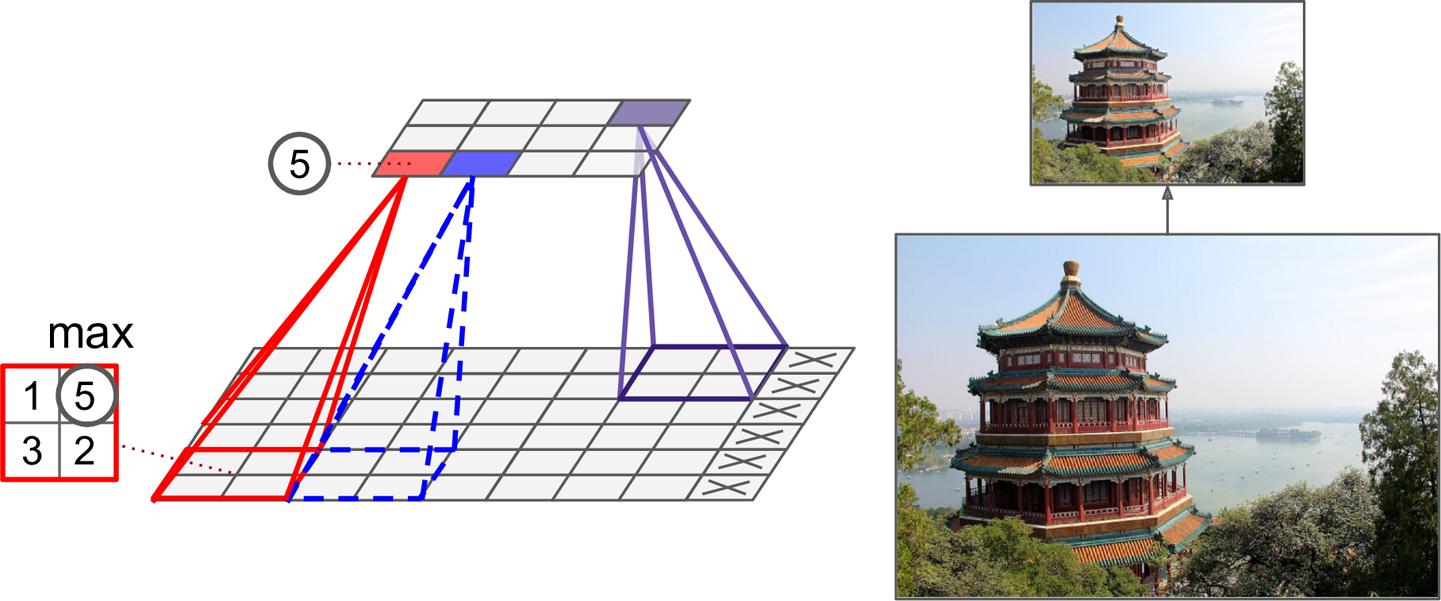

- A max pooling layer also intoduces some level of invariance to smaller translations. By inserting a max pooling layer in every few layers in a CNN, it is possible to get some level of translational invariance at a larger scale. Moreover max pooling offers a small amount of rotational invariance and scale invariance.  Such invariance even though is limited can be useful where the predictions should not be depend on these details, such as classification tasks.

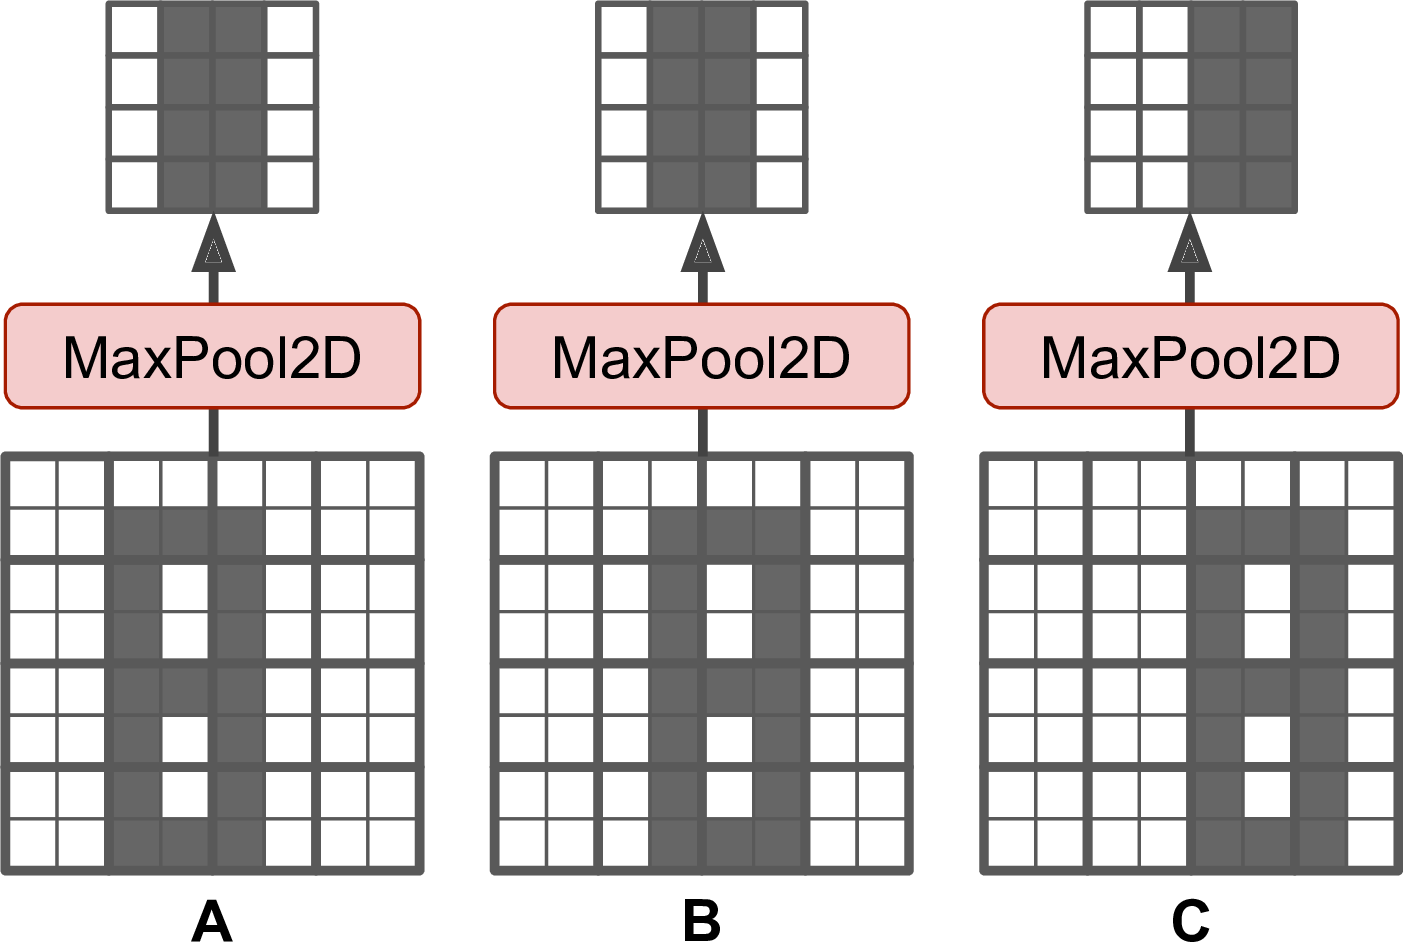

- Max pooling has its downsides too. even with a tiny 2x2 kernel and a stride of 2, the area of the output gets reduced by 2 times in each direction i.e., 4 times in total, simply dropping 75% of the input values.
- In some applications, invariance is not desirable. In the case of semantic segmentation, if the input is translated by one pixel to the right, the output should also be translated by one pixel to the right. The goal in this case is equivariance, not invariance.

### Max pooling

In [34]:
max_pool = keras.layers.MaxPool2D(pool_size = 2)

- Average pooling layers used to be more popular but most people use max pooling layers now as they generally perform better. This may seem surprising as computing the mean losses less info than computing the maximum value. 
- On the other hand max pooling preserves the strongest signals, getting rid of the meaningless ones, thus providing a cleaner signal. Maxpooling offers more translational invariance than Average pooling and requires slightly less computation.

In [35]:
cropped_images = np.array([crop(image) for image in images], dtype = np.float32) #Croppping the images

In [36]:
output = max_pool(cropped_images)

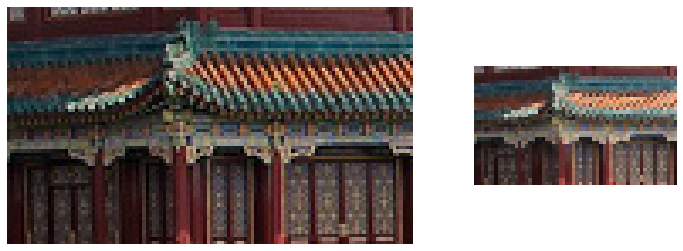

In [37]:
fig = plt.figure(figsize = (12, 8))
grd = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2, 1])
ax1 = fig.add_subplot(grd[0, 0])
ax1.imshow(cropped_images[0])
ax1.axis('off')
ax2 = fig.add_subplot(grd[0, 1])
ax2.imshow(output[0])
ax2.axis('off')
plt.show()

In [38]:
output.shape

TensorShape([2, 35, 60, 3])

In [39]:
cropped_images.shape

(2, 70, 120, 3)

- We can see that the dimensions of the image after max pooling has reduced to half in both directions.

- Max pooling and Average pooling can be performed along the depth dimensions rather than spatial dimensions, even though it is not common. This can allow the CNN to learn to be invariant to various features. For example it could learn multiple filters, each detecting a different rotation of the same pattern and the depthwise max pooling layer would ensure that the output is the same regardless of the rotation.
- The CNN could learn to be invariant to anything else:thickness, brightness, skew, color and so on.

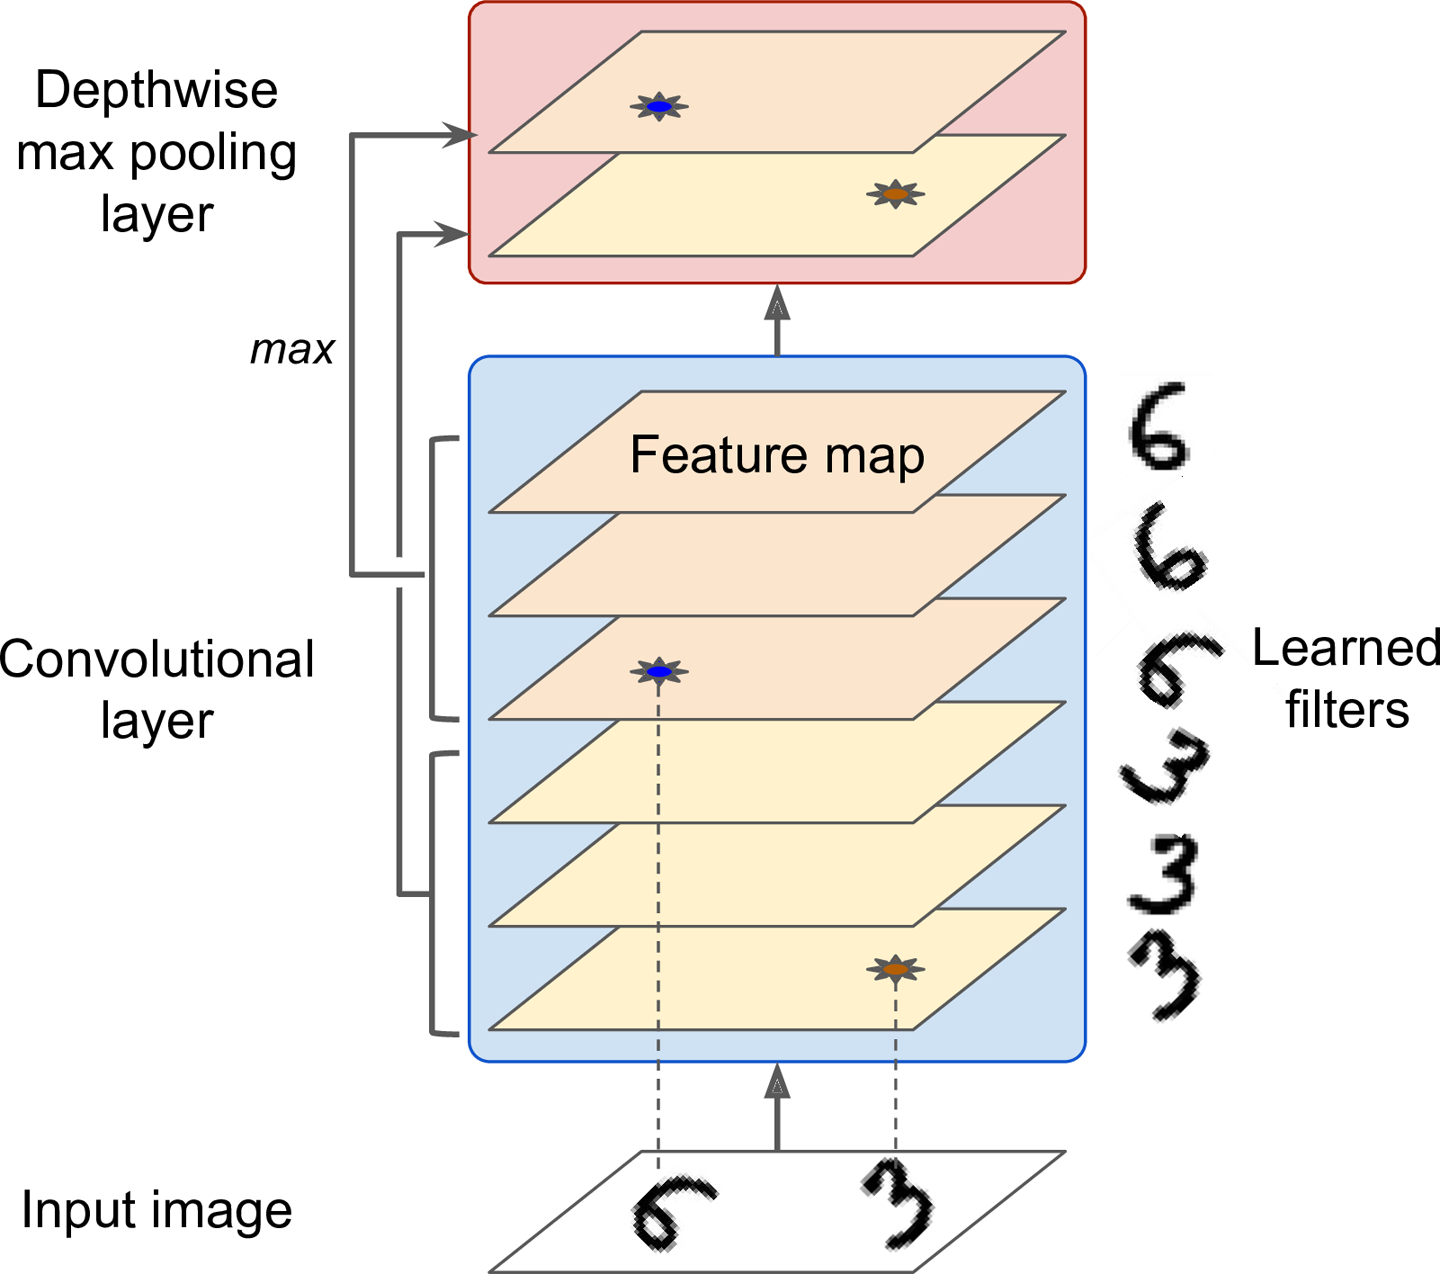

### Depthwise pooling

In [40]:
class DepthMaxPool(keras.layers.Layer):
    def __init__(self, pool_size, strides = None, padding = 'VALID', **kwargs): #init func
        super().__init__(**kwargs)
        if strides is None:
            strides = pool_size # If not strides given, then stride is equal to pool size
        self.pool_size = pool_size
        self.strides = strides
        self.padding = padding
    def call(self, inputs):
        return tf.nn.max_pool(inputs, ksize = (1, 1, 1, self.pool_size), strides = (1, 1, 1, self.pool_size), padding = self.padding)

- Here the first 3 values of the tuple ksize is 1 which indicates that the kernel size and the stride along the batch_size, height and weight is equal to 1. The last value should be the kernel size and stride value we want along the depth dimension.

In [41]:
depth_pool = DepthMaxPool(3) # Max pooling layer of pool size 3

In [42]:
with tf.device('/cpu:0'): 
    depth_output = depth_pool(cropped_images)

In [43]:
depth_output.shape

TensorShape([2, 70, 120, 1])

- We can also use a Lambda layer

In [44]:
depth_pool = keras.layers.Lambda(lambda x : tf.nn.max_pool(x, ksize = (1, 1, 1, 3), strides = (1, 1, 1, 3), padding = 'VALID'))

In [45]:
with tf.device('/cpu:0'):
    depth_output = depth_pool(cropped_images)

In [46]:
depth_output.shape

TensorShape([2, 70, 120, 1])

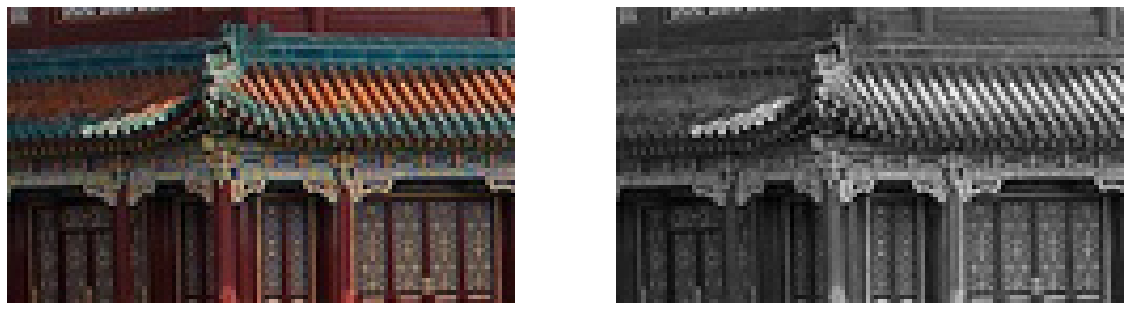

In [47]:
plt.figure(figsize = (20, 20))
plt.subplot(1, 2, 1)
plot_color_image(cropped_images[0])
plt.subplot(1, 2, 2)
plot_image(depth_output[0])
plt.show()

### Average pooling

In [48]:
avg_pool = keras.layers.AvgPool2D(pool_size = 2)

In [49]:
output_avg = avg_pool(cropped_images)

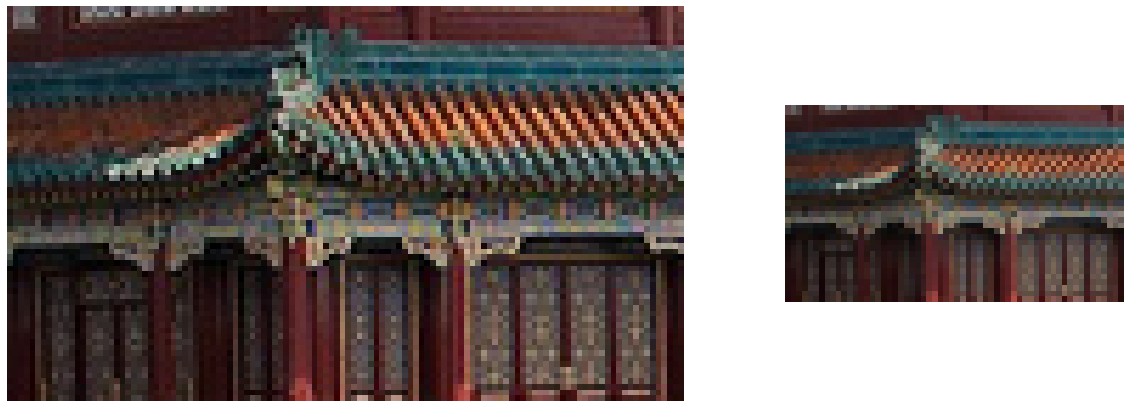

In [50]:
fig = plt.figure(figsize = (20, 20))
grd = mpl.gridspec.GridSpec(nrows = 1, ncols = 2, width_ratios = [2, 1])
ax1 = fig.add_subplot(grd[0,0])
ax1.imshow(cropped_images[0])
ax1.axis('off')
ax2 = fig.add_subplot(grd[0, 1])
ax2.imshow(output_avg[0])
ax2.axis('off')
plt.show()

### Global average pooling

- This type of pooling works very differently, it computes the mean of each enitre feature map. Its like an average pooling layer with the kernel size same as the spatial dimensions of the input. It outputs a single value per feature map per instance.
- Although it is extremely destructive as most of the information in the input is lost, it can be useful as the output layer

In [51]:
global_avg_pool = keras.layers.GlobalAvgPool2D()

In [52]:
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45952243, 0.33423486]], dtype=float32)>

In [53]:
output_global_avg2 = keras.layers.Lambda(lambda x : tf.reduce_mean(x, axis = [1, 2]))

In [54]:
output_global_avg2(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45952243, 0.33423486]], dtype=float32)>

## CNN architectures

- Typical CNN architectures stack a few convolution layers, each one generally followed by a relu layer, then a pooling layer, then another few conv. layers + relu, then another pooling layer and so on.
- The image gets smaller and smaller as it passes through the network but it also typically gets deeper and deeper i.e., with more feature maps.
- At the top of the stack, a regular feed forward network is added, which consists of a set of fully connected layers(+RELUs) and the final layer outputs the predictions.

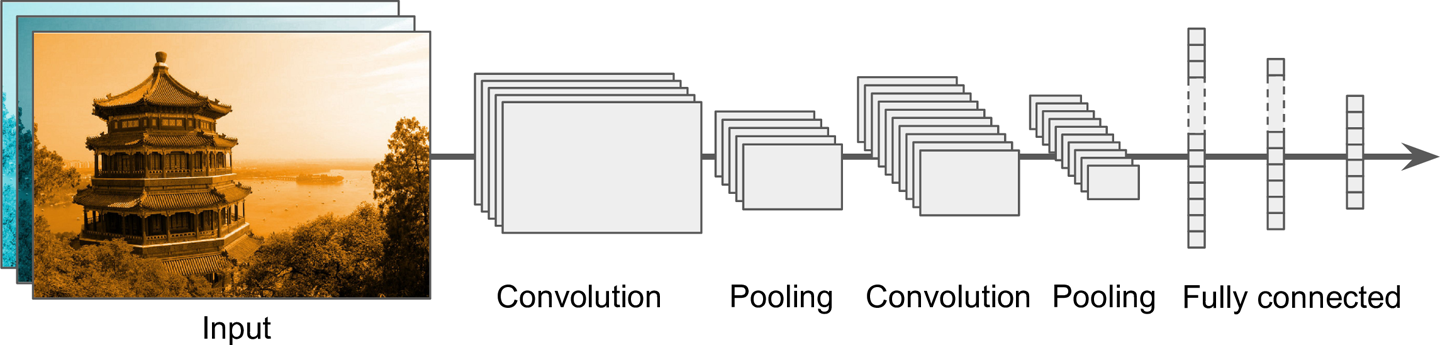

- A common mistake is to use convolutional kernels that are too large. For example instead of using a conv. layer of kernel size 5x5, use two stacked layers of size 3x3. this will use less no. of parameeters and require fewer computations, thereby perfomring better.
- An exception would be to use a larger kernel in the first layer, usually with a stride of 2 or more. It helps in reducing the spatial dimensions of the input image without losing much info. Also most of the images will have 3 channels only, so not that computationally expensive.